In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#Seaborn Styles
sns.set_palette("Set2")
sns.set_style("ticks")

In [0]:
data = pd.read_csv("train.csv")

In [0]:
weather = pd.read_csv("sf_weather.csv")

In [40]:
weather.head()

,date,avg_temp (celsius),precipitation (mm),wind_speed (km/h),visibility (km),"moon_illumination, %"
0,2003-01-01,9,0.00,3,15.0,"Waning Crescent, 1"
1,2003-01-02,10,0.00,5,15.0,"Waning Crescent, 0"
2,2003-01-03,10,0.00,5,15.0,"New Moon, 1"
3,2003-01-04,11,0.00,5,15.0,"Waxing Crescent, 5"
4,2003-01-05,11,0.25,5,6.0,"Waxing Crescent, 10"


In [41]:
weather_missing = pd.DataFrame(weather.isnull().mean()*100, columns=["Missing Values %"])
weather_missing

,Missing Values %
date,0.0
avg_temp (celsius),0.0
precipitation (mm),0.0
wind_speed (km/h),0.0
visibility (km),0.0
"moon_illumination, %",0.0


In [42]:
data_missing = pd.DataFrame(data.isnull().mean()*100, columns=["Missing Values %"])
data_missing

,Missing Values %
Dates,0.0
Category,0.0
Descript,0.0
DayOfWeek,0.0
PdDistrict,0.0
Resolution,0.0
Address,0.0
X,0.0
Y,0.0


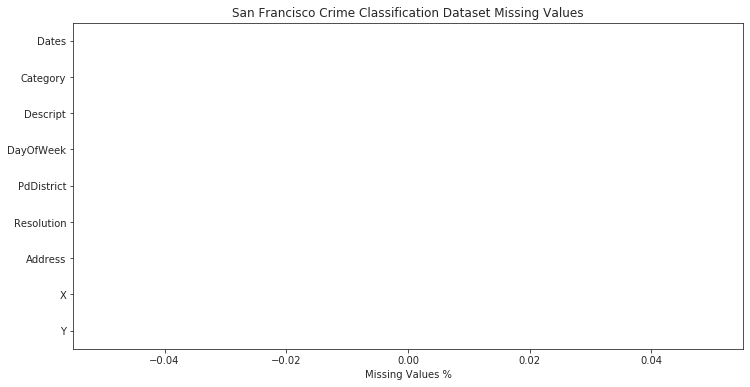

In [43]:
plt.figure(figsize=(12,6))
sns.barplot(x=data_missing["Missing Values %"], y=data_missing.index)
plt.title("San Francisco Crime Classification Dataset Missing Values")
plt.show()

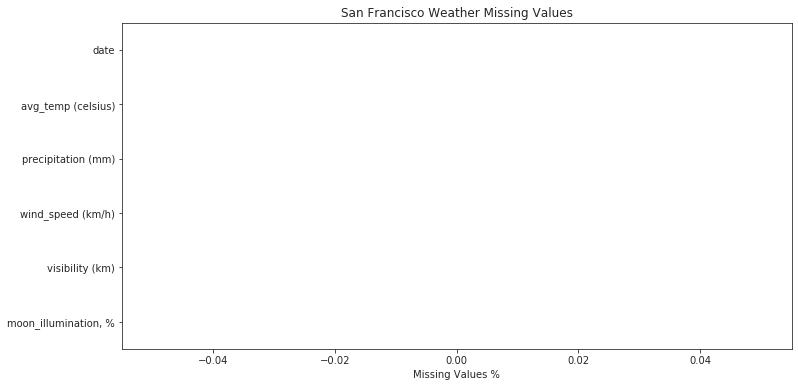

In [44]:
plt.figure(figsize=(12,6))
sns.barplot(x=weather_missing["Missing Values %"], y=weather_missing.index)
plt.title("San Francisco Weather Missing Values")
plt.show()

In [0]:
weather["date"] = pd.to_datetime(weather["date"])
weather.set_index(weather["date"], drop=True, inplace=True)

In [0]:
weather.drop(columns=["date"], inplace=True)

In [47]:
weather.head()

,avg_temp (celsius),precipitation (mm),wind_speed (km/h),visibility (km),"moon_illumination, %"
date,,,,,
2003-01-01,9,0.00,3,15.0,"Waning Crescent, 1"
2003-01-02,10,0.00,5,15.0,"Waning Crescent, 0"
2003-01-03,10,0.00,5,15.0,"New Moon, 1"
2003-01-04,11,0.00,5,15.0,"Waxing Crescent, 5"
2003-01-05,11,0.25,5,6.0,"Waxing Crescent, 10"


In [48]:
data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [49]:
data.isnull().mean()

Dates         0.0
Category      0.0
Descript      0.0
DayOfWeek     0.0
PdDistrict    0.0
Resolution    0.0
Address       0.0
X             0.0
Y             0.0
dtype: float64

In [50]:
data.dtypes

Dates          object
Category       object
Descript       object
DayOfWeek      object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
dtype: object

We need to convert the column "Dates" to datetime

In [0]:
data["Dates"] = pd.to_datetime(data["Dates"])
data.set_index(data["Dates"], drop=True, inplace=True)

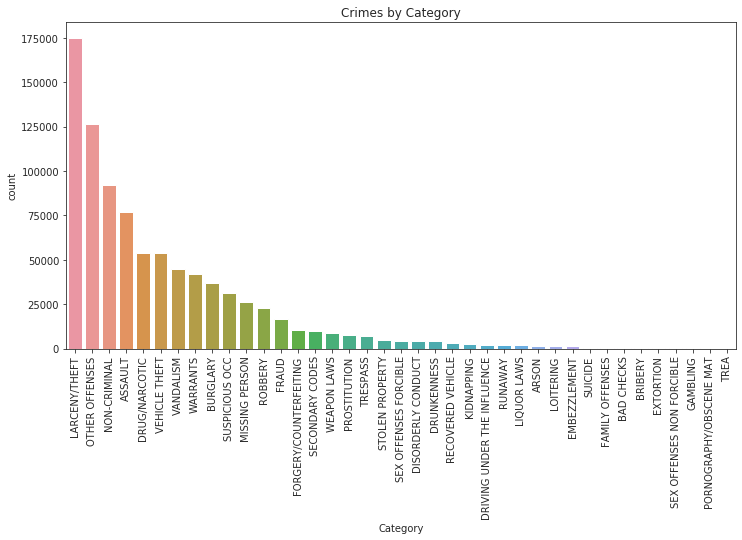

In [52]:
plt.figure(figsize=(12,6))
sns.countplot(x="Category", data=data, order=data["Category"].value_counts().index)
plt.title("Crimes by Category")
plt.xticks(rotation=90)
plt.show()

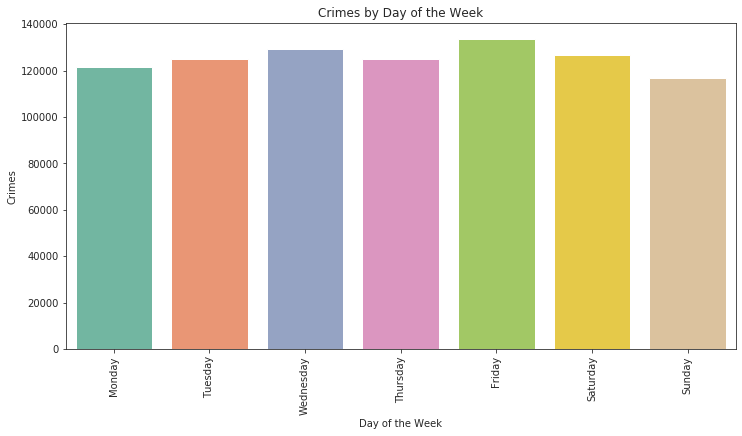

In [53]:
plt.figure(figsize=(12,6))
sns.countplot(x="DayOfWeek", data=data, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("Crimes by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Crimes")
plt.xticks(rotation=90)
plt.show()

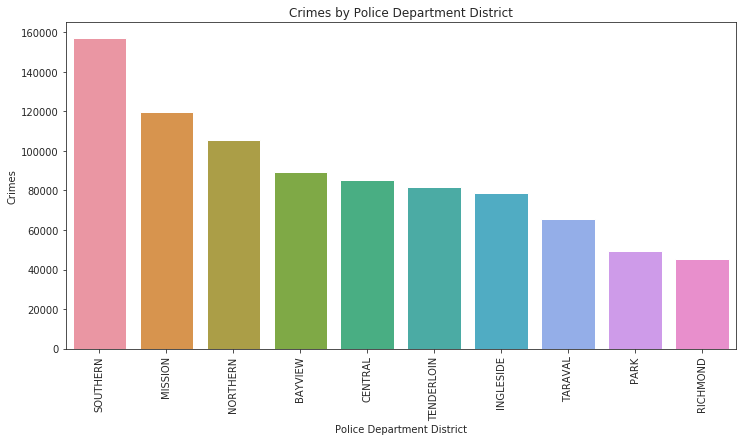

In [54]:
plt.figure(figsize=(12,6))
sns.countplot(x="PdDistrict", data=data, order=data["PdDistrict"].value_counts().index)
plt.xlabel("Police Department District")
plt.ylabel("Crimes")
plt.title("Crimes by Police Department District")
plt.xticks(rotation=90)
plt.show()


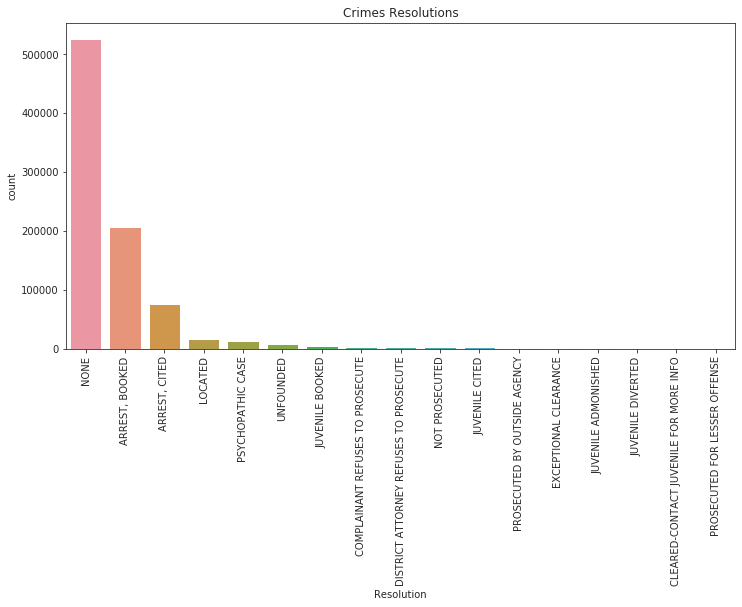

In [55]:
plt.figure(figsize=(12,6))
sns.countplot(x="Resolution", data=data, order=data["Resolution"].value_counts().index)
plt.title("Crimes Resolutions")
plt.xticks(rotation=90)
plt.show()

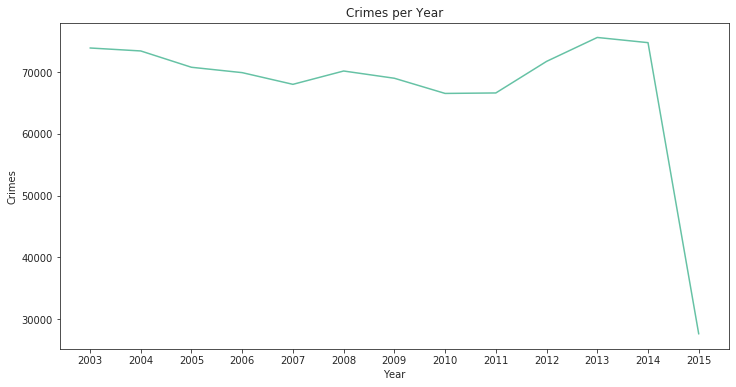

In [56]:
plt.figure(figsize=(12,6))
yearly_crimes = data["Category"].resample("Y").count()
years = [x for x in range(2003, 2016)]
sns.lineplot(x=years, y=yearly_crimes.values)
plt.xlabel("Year")
plt.ylabel("Crimes")
plt.xticks(years, years)
plt.title("Crimes per Year")
plt.show()

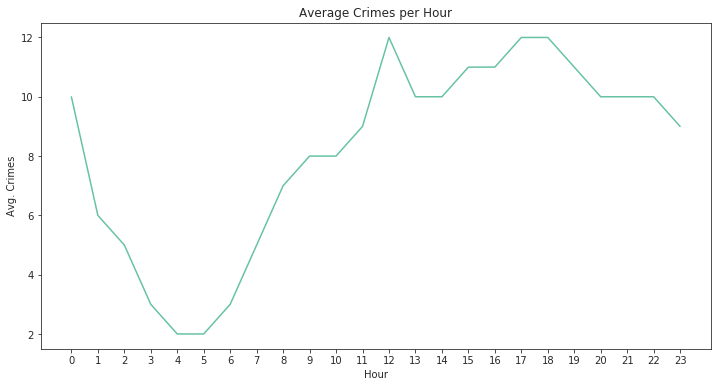

In [57]:
plt.figure(figsize=(12,6))
hourly_crimes = data["Category"].resample("H").count()
hours = [x for x in range(0, 24)]
hourly_crimes = round(hourly_crimes.groupby(hourly_crimes.index.hour).mean(),0)
hourly_crimes.values
sns.lineplot(x=hours, y=hourly_crimes.values)
plt.xlabel("Hour")
plt.ylabel("Avg. Crimes")
plt.title("Average Crimes per Hour")
plt.xticks(hours, hours)
plt.show()

In [58]:
weather.columns

Index(['avg_temp (celsius)', 'precipitation (mm)', 'wind_speed (km/h)',
       'visibility (km)', 'moon_illumination, %'],
      dtype='object')

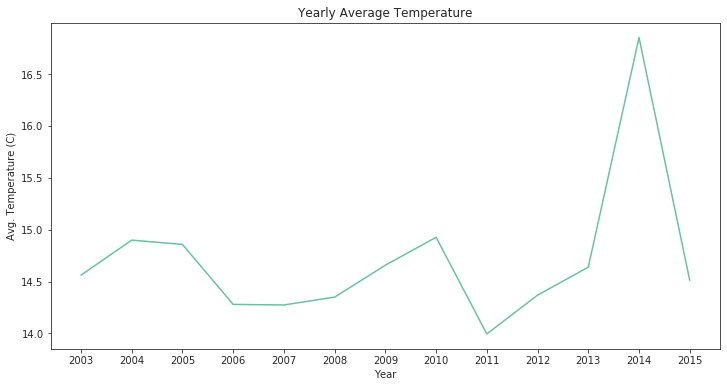

In [59]:
plt.figure(figsize=(12,6))
yearly_vals = weather["avg_temp (celsius)"].resample("Y").mean()
years = [x for x in range(2003, 2016)]
sns.lineplot(x=years, y=yearly_vals.values)
plt.xlabel("Year")
plt.ylabel("Avg. Temperature (C)")
plt.xticks(years, years)
plt.title("Yearly Average Temperature")
plt.show()